In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.1/749.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━

In [4]:
!pip install roboflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00


In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="UXG2kkZg9M15HKDBGFCU")
project = rf.workspace("bnvs-co69a").project("semi_aug")
version = project.version(2)
dataset = version.download("yolov8", location="/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.42, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2 in yolov8:: 100%|██████████| 1394/1394 [00:08<00:00, 173.02it/s]


In [6]:
!cat /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/data.yaml

names:
- budge circuit
- circle
- curve circuit
- cut circuit
- dot
- edge circuit
- fat circuit
- line
- scratch
- short circuit
- spot
- thin circuit
nc: 12
roboflow:
  license: CC BY 4.0
  project: semi_aug
  url: https://universe.roboflow.com/bnvs-co69a/semi_aug/dataset/2
  version: 2
  workspace: bnvs-co69a
test: ../test/images
train: /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/train/images
val: /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images


In [7]:
!pip install PyYAML -q

In [8]:
# yaml 파일을 학습이 가능하도록 경로 설정.
# key-value 데이터인 dict 데이터타입으로 data['train'], data['val'], data['nc'], data['names'] 에 넣어주는데,
# 가장 중요한 부분은 데이터 경로 설정임.

import yaml

data = { 'train' : '/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/train/images',
         'val' : '/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images',
         'test' : '/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/test/images',
         'names' : ['budge circuit', 'circle', 'curve circuit', 'cut circuit', 'dot', 'edge circuit', 'fat circuit', 'line', 'scratch', 'short circuit', 'spot', 'thin circuit'],
         'nc' : 12 }

with open('/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/data.yaml', 'w') as f:
  yaml.dump(data, f)


with open('/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/data.yaml', 'r') as f:
  data_yaml = yaml.safe_load(f)
  display(data_yaml)

{'names': ['budge circuit',
  'circle',
  'curve circuit',
  'cut circuit',
  'dot',
  'edge circuit',
  'fat circuit',
  'line',
  'scratch',
  'short circuit',
  'spot',
  'thin circuit'],
 'nc': 12,
 'test': '/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/test/images',
 'train': '/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/train/images',
 'val': '/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images'}

In [9]:
!cat /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/data.yaml

names:
- budge circuit
- circle
- curve circuit
- cut circuit
- dot
- edge circuit
- fat circuit
- line
- scratch
- short circuit
- spot
- thin circuit
nc: 12
test: /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/test/images
train: /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/train/images
val: /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images


In [10]:
# Load YOLOv8n

from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model

100%|██████████| 6.23M/6.23M [00:00<00:00, 260MB/s]


In [11]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [12]:
model.train(data='/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/data.yaml', epochs=100, patience=30, batch=32, imgsz=1024)

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/data.yaml, epochs=100, time=None, patience=30, batch=32, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

100%|██████████| 755k/755k [00:00<00:00, 89.5MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/train/labels... 573 images, 41 backgrounds, 0 corrupt: 100%|██████████| 573/573 [00:03<00:00, 157.10it/s]


train: New cache created: /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/labels... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<00:00, 159.60it/s]


val: New cache created: /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.6G       2.32      6.021       1.69        129       1024: 100%|██████████| 18/18 [00:07<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]

                   all         81        272      0.017      0.172     0.0634     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.9G      1.922      4.265      1.344        151       1024: 100%|██████████| 18/18 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         81        272      0.015      0.353      0.124     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.8G      1.701      3.325      1.242         75       1024: 100%|██████████| 18/18 [00:04<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]


                   all         81        272     0.0176      0.445      0.259      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.9G      1.673      2.916        1.2        134       1024: 100%|██████████| 18/18 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         81        272     0.0257      0.605      0.391      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.6G      1.614      2.572      1.191        109       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         81        272      0.828      0.176      0.556      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.9G      1.558       2.46      1.162        113       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         81        272      0.755      0.462      0.618      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.7G      1.569      2.219      1.167        126       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         81        272      0.684      0.433      0.484      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.9G       1.51      2.064      1.146        156       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         81        272      0.759      0.526      0.623      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.8G      1.499       1.94      1.157        113       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         81        272       0.77      0.494      0.598      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.9G      1.491       1.77      1.147        133       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         81        272      0.627      0.685      0.756      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.9G      1.516      1.735      1.139        135       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         81        272       0.69      0.742      0.761      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.8G       1.48      1.609      1.119        119       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         81        272       0.82      0.627      0.794      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.9G      1.462      1.541      1.121        146       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         81        272      0.691      0.799      0.857      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.8G       1.45      1.553      1.128        137       1024: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         81        272      0.804      0.854      0.886      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.8G      1.408      1.429      1.098        180       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         81        272      0.838      0.806      0.892      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.9G        1.4      1.372      1.097        116       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         81        272      0.778      0.786      0.866      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.9G      1.418      1.355      1.103        120       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         81        272       0.77       0.84      0.901      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.9G       1.38      1.251      1.091        119       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         81        272       0.74       0.91      0.909      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.9G      1.371      1.239      1.087        110       1024: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         81        272      0.864       0.89      0.931      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.8G      1.366      1.205      1.084        122       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         81        272      0.858      0.837      0.931      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.8G      1.363      1.161      1.076        121       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         81        272      0.806      0.919      0.947      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.9G      1.357       1.12      1.074        157       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         81        272       0.85      0.926       0.93      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.9G      1.348       1.11      1.075        105       1024: 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         81        272      0.807      0.919      0.926      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.8G      1.349      1.079      1.077        113       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         81        272      0.792      0.927      0.918      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.9G      1.329      1.058      1.058        118       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         81        272      0.831      0.913      0.927      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.9G      1.343      1.057      1.073        119       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         81        272      0.841      0.927      0.957      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.9G      1.338      1.032      1.089        133       1024: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         81        272      0.821      0.928      0.941      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.2G      1.345       1.02      1.066        138       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         81        272      0.828      0.887      0.921      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.3G      1.337      1.007      1.063        128       1024: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         81        272      0.887      0.918      0.944      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.6G      1.325      0.988      1.057        205       1024: 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         81        272      0.908      0.841      0.947      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.3G      1.298     0.9546       1.05        126       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         81        272      0.902      0.957       0.96      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.2G      1.312     0.9497      1.084         92       1024: 100%|██████████| 18/18 [00:04<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         81        272      0.904      0.907      0.949      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.9G      1.298      0.923       1.05        134       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         81        272      0.859        0.9      0.912      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.7G      1.288     0.9268      1.041        100       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         81        272      0.905      0.898      0.953      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.9G      1.281      0.887      1.038        132       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         81        272      0.862      0.921      0.929      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.3G      1.287      0.916      1.051        140       1024: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         81        272      0.886      0.938      0.961      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.3G      1.291     0.8873      1.049        122       1024: 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         81        272      0.862      0.942       0.96      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.9G      1.252     0.8456      1.031        126       1024: 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         81        272      0.865      0.907      0.936      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.2G      1.279     0.8606      1.038        121       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         81        272       0.86      0.935      0.929      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.3G      1.277     0.8538      1.049        140       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         81        272      0.899      0.926      0.951      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.6G      1.241     0.8095      1.028        136       1024: 100%|██████████| 18/18 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         81        272      0.884      0.927       0.97      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.9G      1.206     0.7971      1.015        117       1024: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         81        272        0.9      0.971      0.953      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.9G      1.229     0.8088      1.037        125       1024: 100%|██████████| 18/18 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         81        272      0.919      0.922      0.933      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.3G      1.226     0.7955      1.024        109       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         81        272      0.938      0.928      0.956      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.8G      1.216     0.7904      1.024        129       1024: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         81        272      0.929      0.943      0.963      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.3G      1.231     0.7934       1.03        113       1024: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         81        272      0.898      0.919      0.953       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.7G      1.204     0.7733      1.021        124       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         81        272      0.822      0.953      0.927      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.9G      1.198     0.7596      1.014        128       1024: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         81        272      0.905      0.947      0.943      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.2G      1.206     0.7782      1.026        122       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         81        272      0.884      0.947      0.956      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.9G      1.211     0.7649      1.018        157       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         81        272       0.94      0.896      0.949      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.3G      1.163     0.7348      1.006        108       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         81        272      0.941      0.922      0.958      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.3G      1.195     0.7501      1.011        117       1024: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         81        272      0.911      0.939      0.956       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.9G      1.188     0.7258      1.009        110       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         81        272      0.938      0.936      0.967      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.3G      1.194     0.7343       1.01        115       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         81        272       0.94      0.958      0.973      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.3G      1.177     0.7093      1.004        126       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         81        272       0.93      0.952      0.962      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.8G      1.155     0.7017      1.015        101       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         81        272      0.935      0.942      0.965      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.9G      1.148     0.7037     0.9985        125       1024: 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         81        272      0.951      0.915      0.957       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.9G      1.139     0.6876      1.002        105       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         81        272      0.925      0.951       0.96      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.9G      1.162     0.6909      1.004        104       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         81        272      0.951      0.926      0.964      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.8G      1.134     0.6966     0.9986        124       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         81        272      0.963      0.944      0.968      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.3G      1.154     0.6876      1.008        155       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         81        272      0.919      0.963      0.959      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.3G      1.134     0.6761     0.9935        145       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         81        272      0.901      0.955      0.961       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.3G      1.134     0.6647     0.9973        125       1024: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         81        272      0.923      0.931      0.955      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.8G      1.131     0.6667     0.9851        120       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         81        272       0.94       0.94      0.967      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.2G      1.104     0.6797     0.9938        136       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         81        272      0.954      0.933      0.965       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.3G      1.114     0.6535     0.9869        102       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         81        272      0.957       0.95      0.968      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.8G      1.114     0.6531     0.9887        150       1024: 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         81        272      0.942       0.93      0.958      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.9G      1.119     0.6619     0.9887        124       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         81        272      0.917      0.936      0.955      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.3G      1.097      0.634     0.9787        110       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         81        272      0.941      0.939      0.962      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.3G      1.118     0.6496     0.9775        133       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         81        272      0.924      0.927      0.956      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100        11G      1.087     0.6322     0.9806        120       1024: 100%|██████████| 18/18 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         81        272      0.945      0.928      0.956      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.8G      1.074     0.6243     0.9778         94       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         81        272       0.93      0.941      0.947      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.8G      1.066     0.6274     0.9763        106       1024: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         81        272      0.931      0.934      0.961      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.9G      1.074     0.6213     0.9794        125       1024: 100%|██████████| 18/18 [00:04<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         81        272      0.955      0.927      0.961      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.9G      1.067      0.632     0.9721        135       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         81        272      0.959      0.932      0.971      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.9G       1.05     0.6113      0.974        137       1024: 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         81        272      0.936      0.951      0.967      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.8G      1.083      0.639     0.9769        168       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         81        272      0.938      0.937      0.964      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.9G      1.072     0.6181     0.9789        113       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         81        272       0.93      0.948      0.959      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.9G      1.059     0.6261     0.9687        129       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         81        272      0.931      0.926      0.946      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.8G      1.052      0.613     0.9726        131       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         81        272      0.926      0.937      0.949      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.9G       1.04     0.6135     0.9687        122       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         81        272      0.942      0.916      0.947      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.9G       1.05     0.5983     0.9676        123       1024: 100%|██████████| 18/18 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         81        272      0.926      0.939      0.949      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.9G      1.026     0.5876     0.9518        110       1024: 100%|██████████| 18/18 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         81        272       0.94      0.947      0.958      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.6G      1.055     0.5907     0.9633        159       1024: 100%|██████████| 18/18 [00:04<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         81        272      0.949      0.936      0.954      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.3G     0.9983     0.5818     0.9587         97       1024: 100%|██████████| 18/18 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         81        272      0.943      0.944      0.966      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.3G      1.012     0.5848     0.9561        157       1024: 100%|██████████| 18/18 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         81        272      0.948      0.938      0.958       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.3G      1.027     0.5979     0.9566        137       1024: 100%|██████████| 18/18 [00:04<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         81        272      0.934      0.935      0.951      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.9G      1.021     0.5783     0.9608        126       1024: 100%|██████████| 18/18 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         81        272       0.95      0.947      0.964      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.3G      1.013     0.5745     0.9647        166       1024: 100%|██████████| 18/18 [00:04<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         81        272      0.943      0.947      0.968      0.644
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 59, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



89 epochs completed in 0.132 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]


                   all         81        272      0.951      0.924      0.964      0.651
         budge circuit         81          6      0.975          1      0.995      0.644
                circle         81         29      0.992          1      0.995      0.727
         curve circuit         81         60      0.979          1      0.995      0.686
           cut circuit         81          5      0.974          1      0.995      0.841
                   dot         81         51      0.945      0.677      0.886      0.405
          edge circuit         81         27      0.996          1      0.995      0.674
           fat circuit         81         11      0.972          1      0.995      0.769
                  line         81         22      0.969      0.773      0.903      0.748
               scratch         81          7      0.765      0.857      0.953       0.56
         short circuit         81          9          1      0.952      0.995      0.675
                  spo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fbcd1458250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [13]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 12
{0: 'budge circuit', 1: 'circle', 2: 'curve circuit', 3: 'cut circuit', 4: 'dot', 5: 'edge circuit', 6: 'fat circuit', 7: 'line', 8: 'scratch', 9: 'short circuit', 10: 'spot', 11: 'thin circuit'}


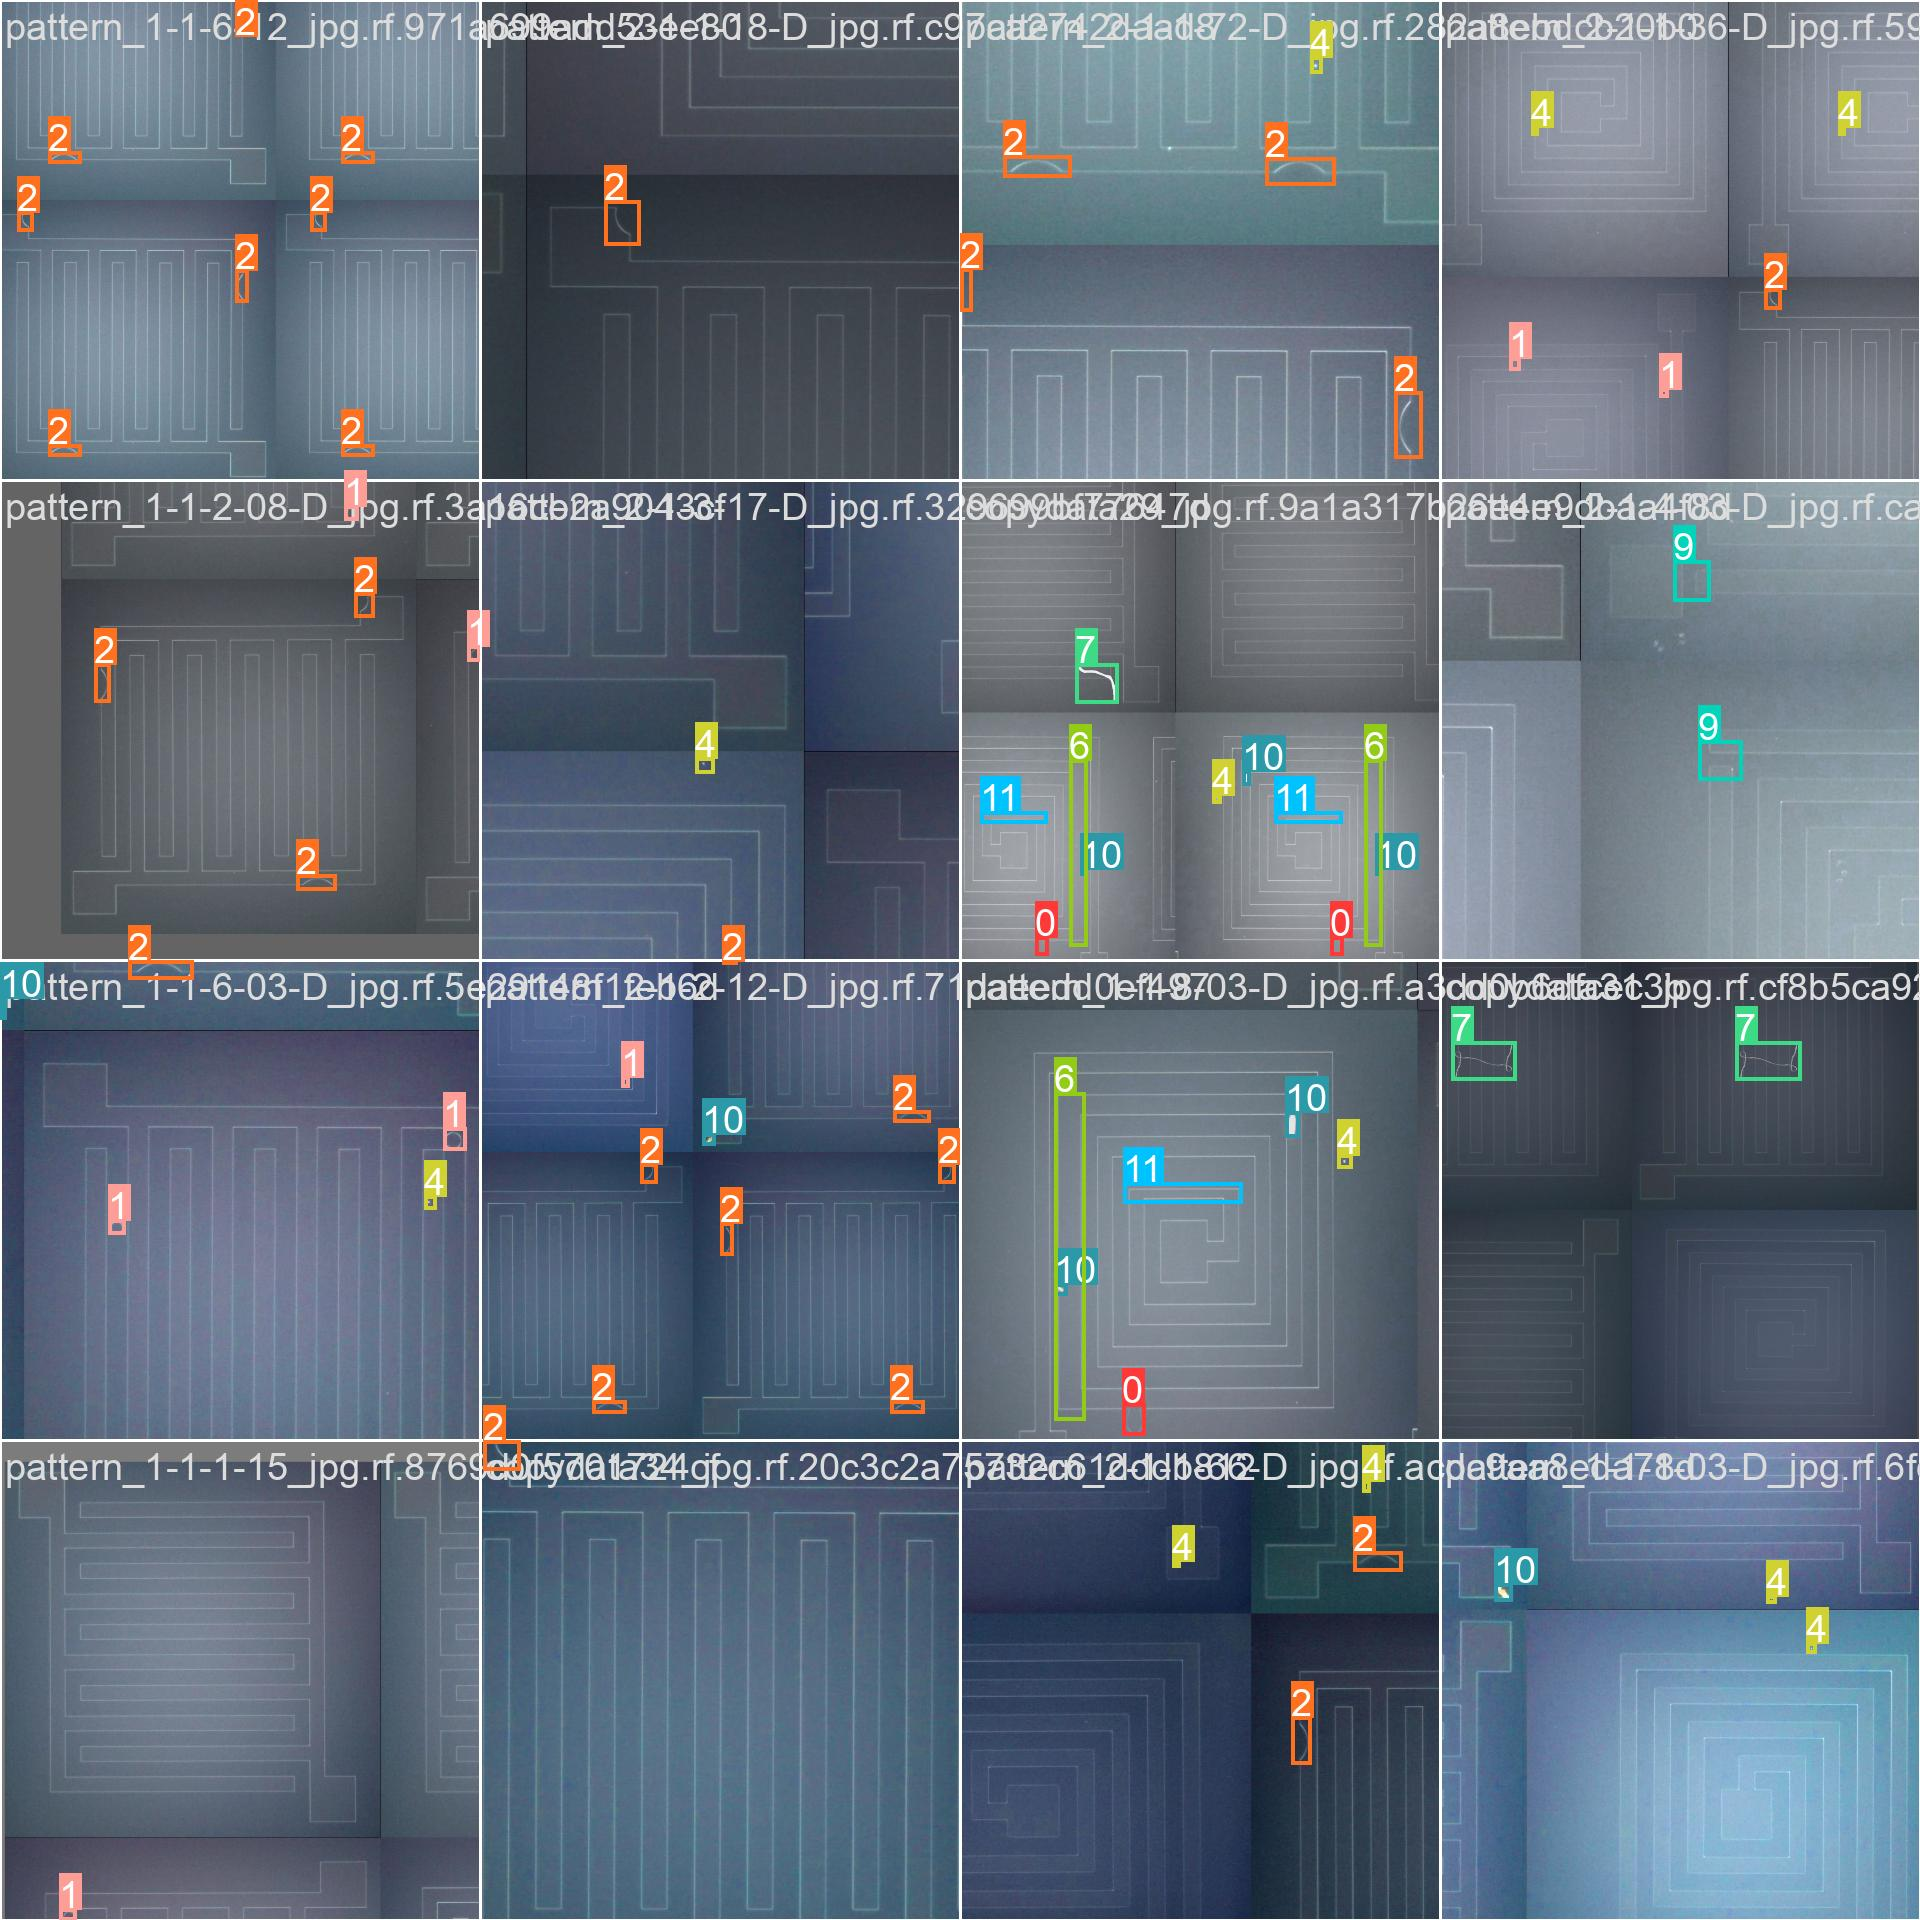

In [ ]:
from PIL import Image
from IPython.display import Image, clear_output
Image(filename='/content/runs/detect/train/train_batch0.jpg',width=1000)

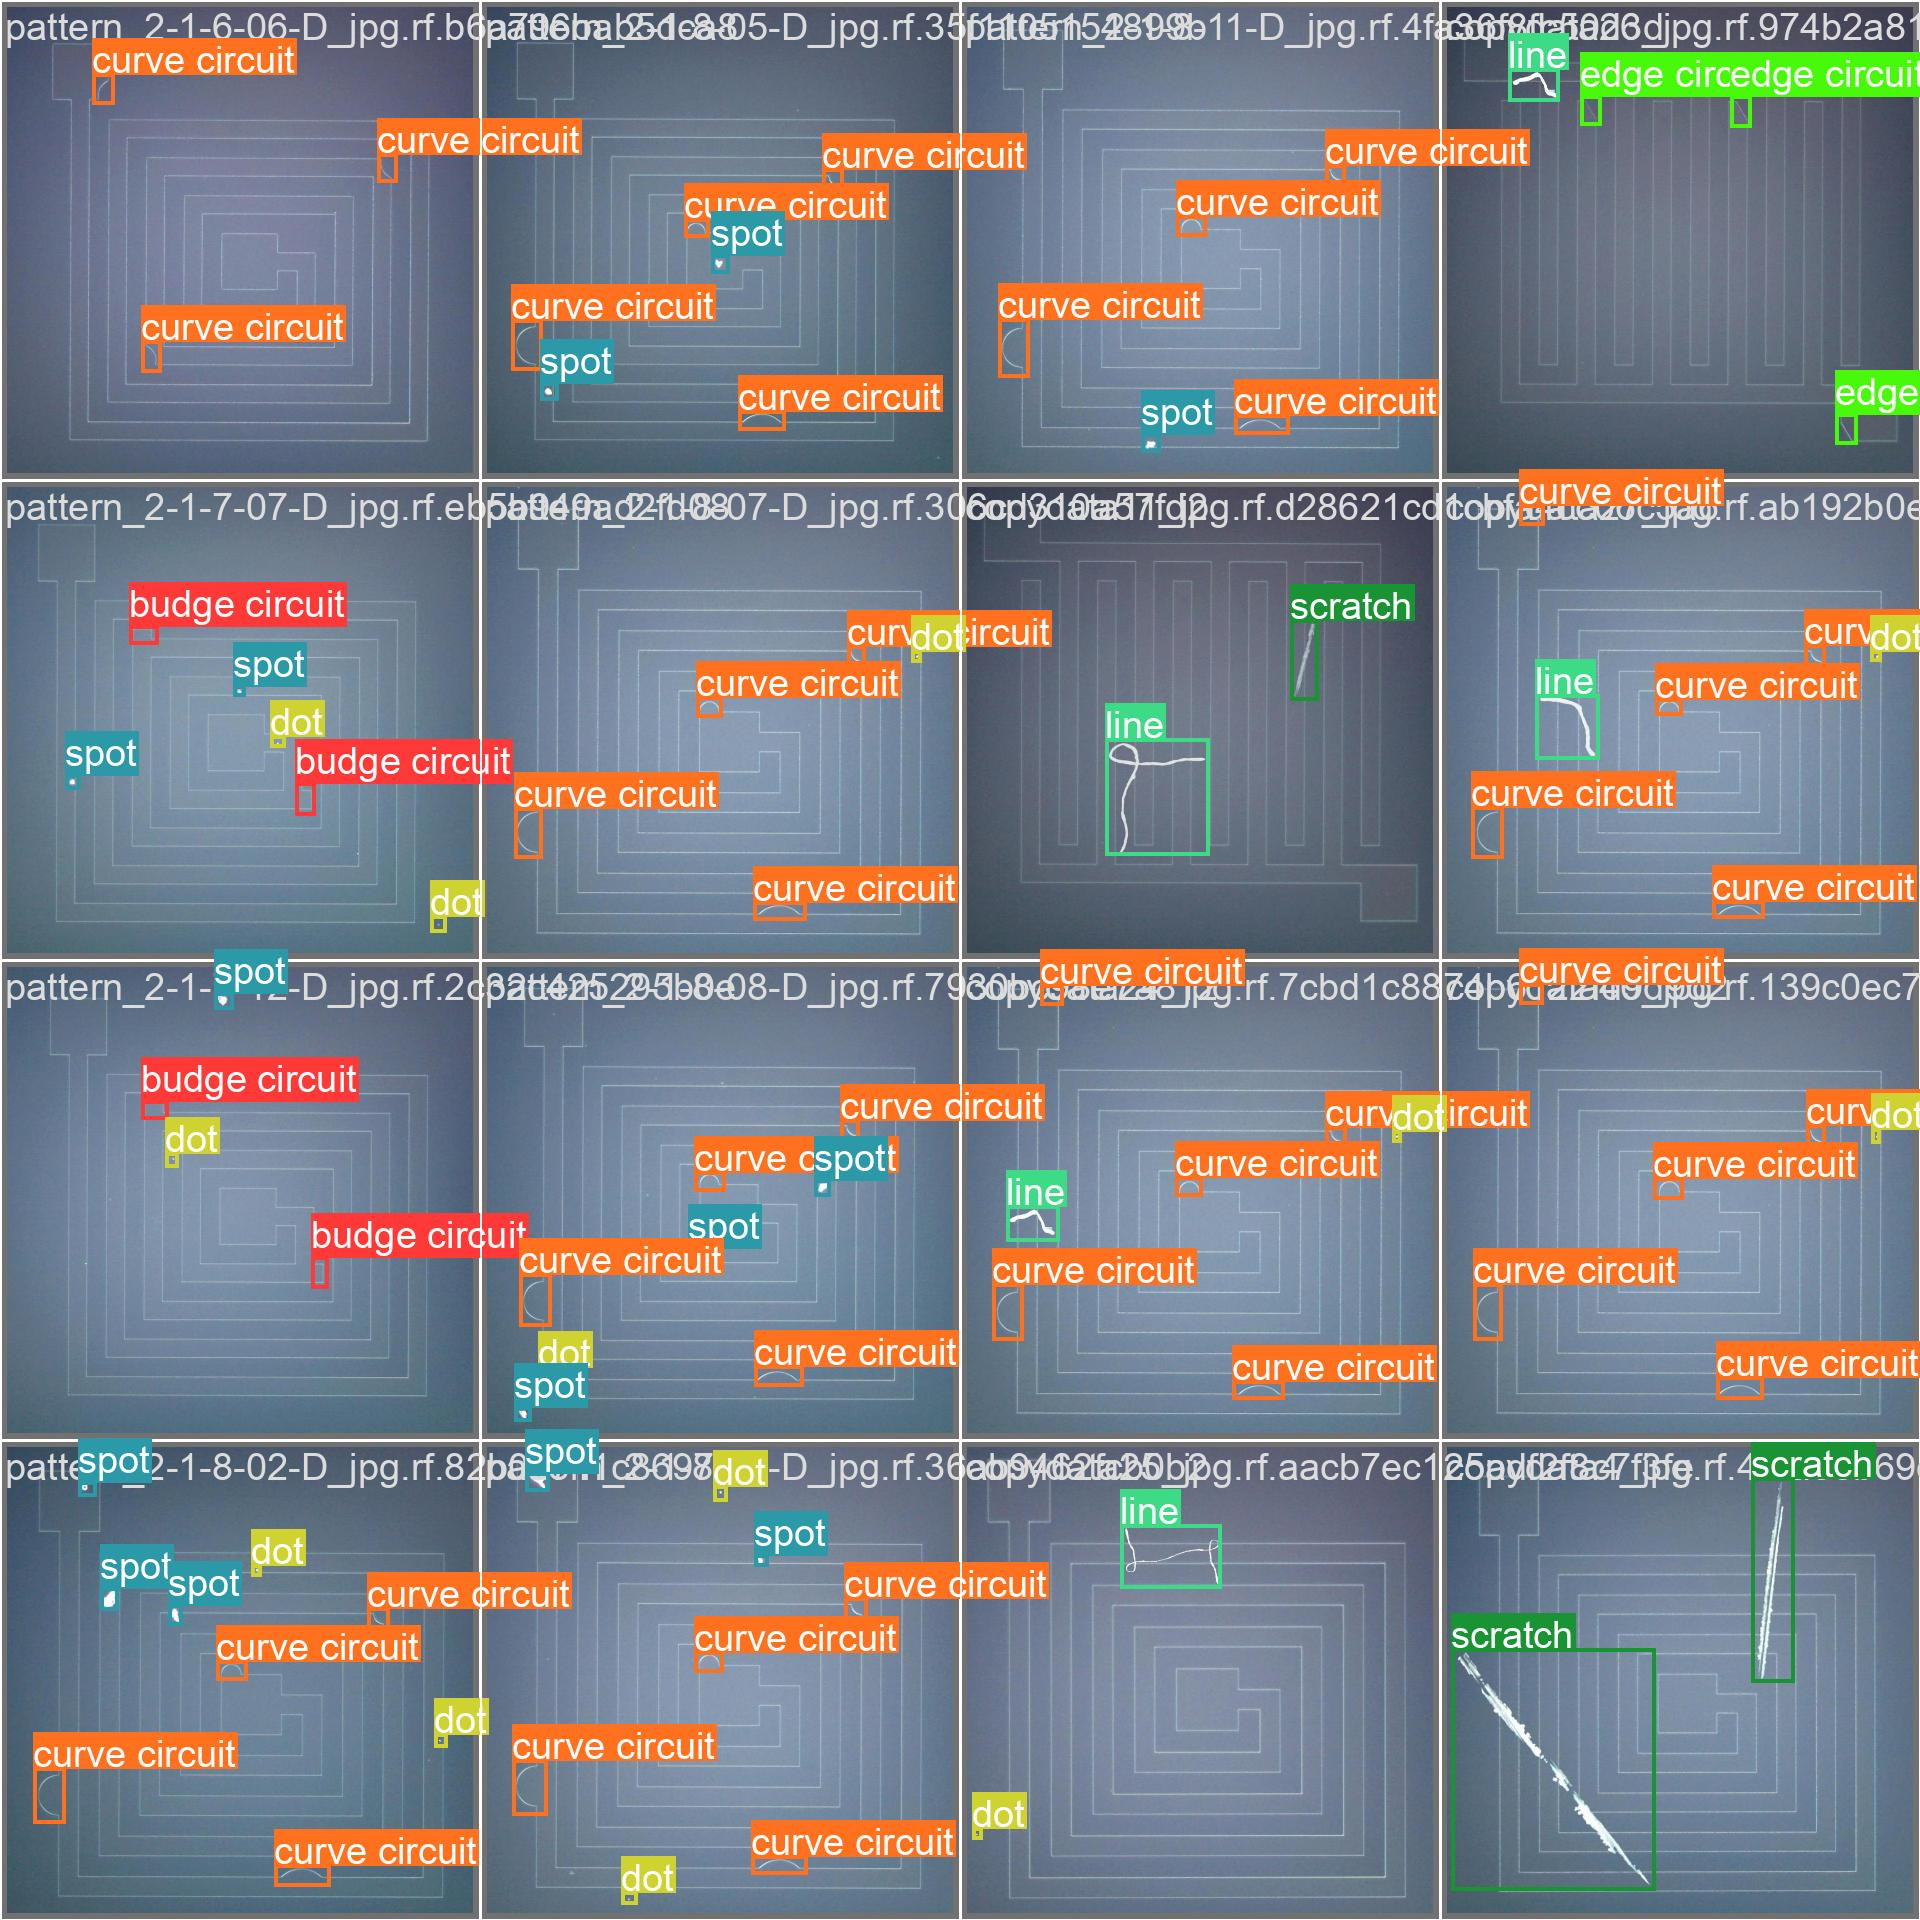

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_labels.jpg',width=1000)

In [24]:
results = model.predict(source='/content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images/', save=True)


image 1/81 /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images/copydata10_jpg.rf.e0f3d4d305f0270839dd8d5ffbb25ba6.jpg: 1024x1024 2 lines, 13.1ms
image 2/81 /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images/copydata11_jpg.rf.d28621cd1cbfa4cc06c5a6579ca8890c.jpg: 1024x1024 1 line, 1 scratch, 9.7ms
image 3/81 /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images/copydata24_jpg.rf.7cbd1c8874b6122fd9d9d22aed6c5a9e.jpg: 1024x1024 5 curve circuits, 1 dot, 1 line, 9.5ms
image 4/81 /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images/copydata25_jpg.rf.aacb7ec125adf2f8c7f3fe70a4d31333.jpg: 1024x1024 1 dot, 1 line, 9.6ms
image 5/81 /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/data_691_2/valid/images/copydata26_jpg.rf.974b2a817eba529dd655bdbda1eecc6a.jpg: 1024x1024 3 edge circuits, 1 line, 9.8ms
image 6/81 /content/drive/MyDrive/kdt_231026/m8_vision/semiconductor/dat

In [25]:
print(type(results), len(results))

<class 'list'> 81


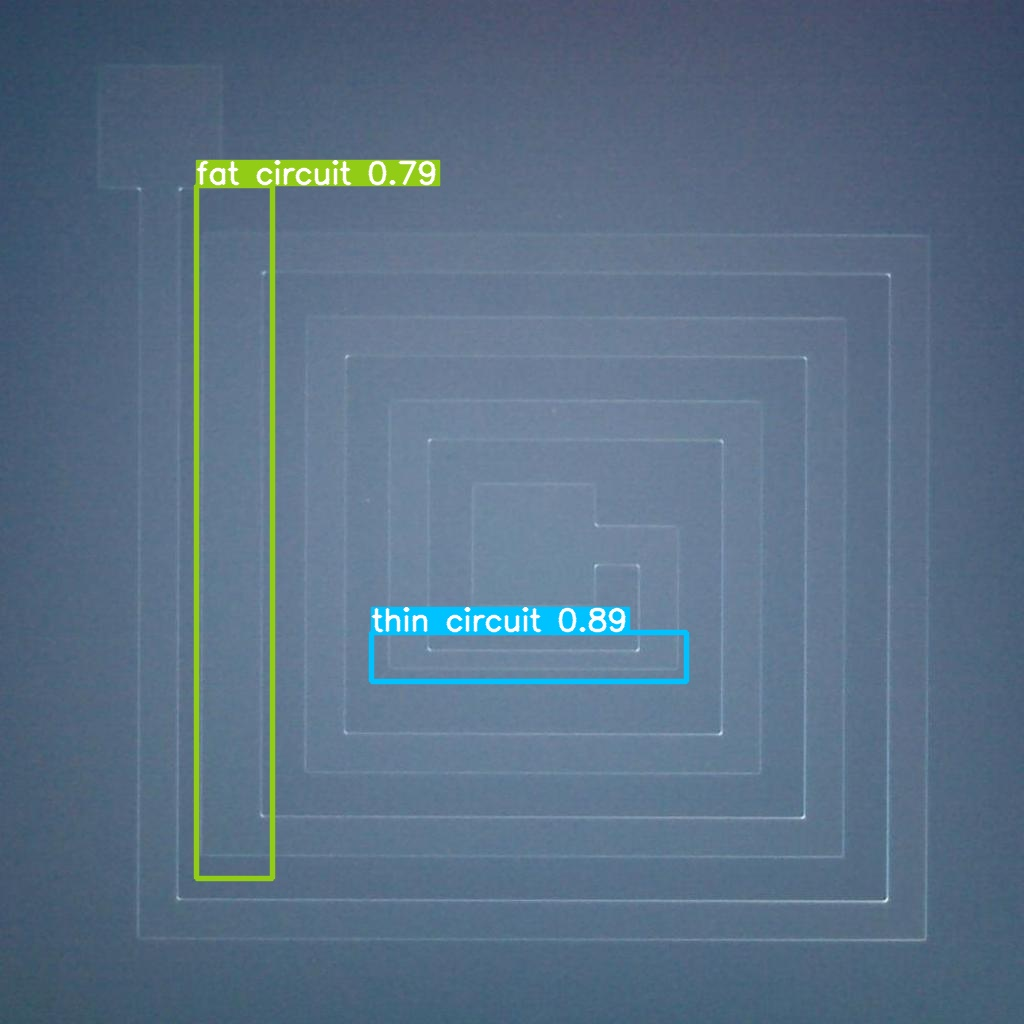

In [30]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/runs/detect/train3/*.jpg'))
display(Image(filename=image_name,width=600,height=600))